## Analysis

1- Temperatures tend to be warmer near the equator (0 latitude) and cool down the further you get away from it. However, the highest temperatures actually tend to be in the zero to ~40 latitude range, most likely as a result of seasonality affects between the hemispheres. The positive latitudes are representative of the northern hemisphere which is currently in the summer season.

2- Wind speeds tend to range between 0 and 20 mph for most cities; over half actually  to be grouped closer to the 0 to 10mph range. There doesn't appear to be a relationship between wind speed and latitude.

3- There appears to be no relationship between latitude and cloudiness or latitude and humidity. Very few cities (only 3) have 100% cloudiness.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import seaborn as sns

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

752

In [4]:
#Create dataframe with list of cities
df = pd.DataFrame(cities)
df = df.rename(columns={0: 'city'})

#Add lat and lngs to dataframe, create separate columns for lats and longs
df['lat_lngs'] = lat_lng_list
df['lat'] = df.lat_lngs.map(lambda x: str(x[0]))
df['long'] = df.lat_lngs.map(lambda x: str(x[1]))

df.head()

,city,lat_lngs,lat,long
0,chokurdakh,"(85.42215126291109, 151.4609073078435)",85.42215126291109,151.4609073078435
1,saskylakh,"(75.51116616852792, 113.28174418310283)",75.51116616852792,113.28174418310283
2,karamay,"(45.91820310375911, 83.12042932434247)",45.91820310375911,83.12042932434247
3,yagodnoye,"(62.72766031540087, 149.94810241572702)",62.72766031540087,149.94810241572702
4,lavrentiya,"(66.83491701038781, -172.3799243808506)",66.83491701038781,-172.3799243808506


## Perform API Calls

In [5]:
api_key = '67a967de9a443f2e193b7add12252b46' #deactivated

#Create new columns for data we'll be collecting from the API
df['temp'] = ""
df['max_temp'] = ""
df['humidity'] = ""
df['wind_speed'] = ""
df['clouds'] = ""

#Iterate over each row
for index, row in df.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    print(url)
    weather = requests.get(url).json()
    try:
        df.loc[index, 'temp'] = weather['main']['temp']
        df.loc[index, 'max_temp'] = weather['main']['temp_max']
        df.loc[index, 'humidity'] = weather['main']['humidity']
        df.loc[index, 'wind_speed'] = weather['wind']['speed']
        df.loc[index, 'clouds'] = weather['clouds']['all']
    except:
        df.loc[index, 'temp'] = 'city not found'
        df.loc[index, 'humidity'] = 'city not found'
        df.loc[index, 'wind_speed'] = 'city not found'
        df.loc[index, 'clouds'] = 'city not found'
    time.sleep(.50)
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=chokurdakh&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saskylakh&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 3 | karamay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=karamay&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 4 | yagodnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yagodnoye&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 5 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lavrentiya&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 6 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tsihombe&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 7 | kwinana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kwinana&APPID=67a967de9a443f2e193b7add

Processing Record 58 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cape&town&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 59 | corinth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=corinth&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 60 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=butaritari&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 61 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=severo-kurilsk&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 62 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sorong&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 63 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kruisfontein&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 64 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nanortalik&APPID=6

Processing Record 115 | huntsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=huntsville&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 116 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mahebourg&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 117 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=araouane&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 118 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=puerto&ayora&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 119 | bongor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bongor&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 120 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=puerto&leguizamo&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 121 | campbell river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=c

Processing Record 172 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dikson&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 173 | thyboron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=thyboron&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 174 | malabugas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=malabugas&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 175 | saint-paul-les-dax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-paul-les-dax&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 176 | hopewell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hopewell&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 177 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=praia&da&vitoria&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 178 | prince albert
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 229 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hay&river&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 230 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=umzimvubu&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 231 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-augustin&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 232 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=port&blair&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 233 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-pierre&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 234 | saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint&john&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 235 | queenstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q

Processing Record 286 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tautira&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 287 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=makakilo&city&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 288 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=zhigansk&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 289 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=samarai&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 290 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=luderitz&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 291 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ngukurr&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 292 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=carnarvon&APPID=67a967de9a44

Processing Record 343 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fairbanks&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 344 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=upernavik&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 345 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=laguna&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 346 | komsomolets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=komsomolets&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 347 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fare&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 348 | artyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=artyk&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 349 | zonguldak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=zonguldak&APPID=67a967de9a443f2e193b7add

Processing Record 400 | farmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=farmington&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 401 | elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=elko&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 402 | carauari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=carauari&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 403 | irbeyskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=irbeyskoye&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 404 | kuala terengganu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kuala&terengganu&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 405 | dolbeau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dolbeau&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 406 | caramoan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=caramoan&APPID=67a9

Processing Record 456 | hildburghausen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hildburghausen&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 457 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tabou&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 458 | say
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=say&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 459 | de haan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=de&haan&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 460 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bubaque&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 461 | itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=itoman&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 462 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sakaiminato&APPID=67a967de9a443f2e193b7add

Processing Record 513 | copperas cove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=copperas&cove&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 514 | numaligarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=numaligarh&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 515 | pospelikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pospelikha&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 516 | mariental
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mariental&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 517 | great yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=great&yarmouth&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 518 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ambilobe&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 519 | yialos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yia

Processing Record 570 | mirpur bathoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mirpur&bathoro&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 571 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=codrington&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 572 | liverpool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=liverpool&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 573 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vilyuysk&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 574 | ilinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ilinskiy&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 575 | chiknayakanhalli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=chiknayakanhalli&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 576 | aracoiaba da serra
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 626 | challapata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=challapata&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 627 | cocobeach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cocobeach&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 628 | morlaix
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=morlaix&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 629 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=richards&bay&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 630 | silvassa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=silvassa&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 631 | mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mpika&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 632 | salvador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=salvador&APPID=67a967de9a44

Processing Record 683 | el carmen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=el&carmen&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 684 | media luna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=media&luna&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 685 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=the&valley&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 686 | jibuti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=jibuti&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 687 | vallenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vallenar&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 688 | axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=axim&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 689 | san rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=san&rafael&APPID=67a967de9a443f2e

Processing Record 740 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=buraydah&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 741 | dukat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dukat&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 742 | cuiluan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cuiluan&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 743 | mapiripan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mapiripan&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 744 | mudon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mudon&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 745 | itupiranga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=itupiranga&APPID=67a967de9a443f2e193b7add12252b46
Processing Record 746 | nan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nan&APPID=67a967de9a443f2e193b7add12252b46
Pro

In [6]:
#Remove any cities that could not be found from the dataframe
df = df[df.temp != 'city not found']

#Check that there are still 500+ records
len(df)

651

In [7]:
#Convert lat from string to float object
df.lat = df.lat.astype(float)
df.head()

,city,lat_lngs,lat,long,temp,max_temp,humidity,wind_speed,clouds
0,chokurdakh,"(85.42215126291109, 151.4609073078435)",85.422151,151.4609073078435,52.33,52.33,83,8.66,0
1,saskylakh,"(75.51116616852792, 113.28174418310283)",75.511166,113.28174418310283,65.38,65.38,100,4.63,56
3,yagodnoye,"(62.72766031540087, 149.94810241572702)",62.727660,149.94810241572702,68.35,68.35,32,2.95,92
4,lavrentiya,"(66.83491701038781, -172.3799243808506)",66.834917,-172.3799243808506,39.37,39.37,92,8.43,68
6,kwinana,"(-31.678497848861994, 114.23368299208227)",-31.678498,114.23368299208227,56.14,59,93,4.7,0


## Latitude vs Temperature Plot

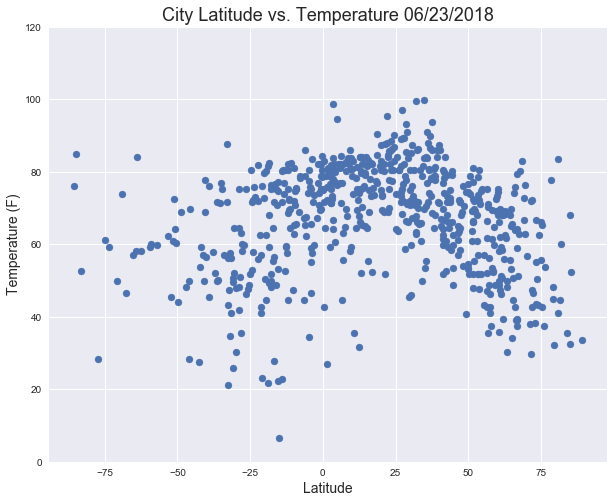

In [27]:
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['temp'])
plt.title(f"City Latitude vs. Temperature {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Temperature (F)", fontsize="14")
plt.ylim(0, 120)

plt.savefig("Temperature.png")

plt.show()

## Latitude vs Humidity Plot

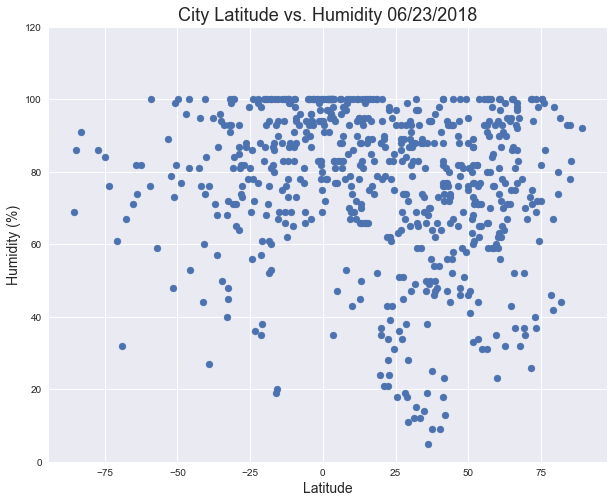

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['humidity'])                              
plt.title(f"City Latitude vs. Humidity {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")

plt.ylim(0,120)

plt.savefig("Images/Humidity.png")

plt.show()

## Latitude vs. Wind Speed Plot

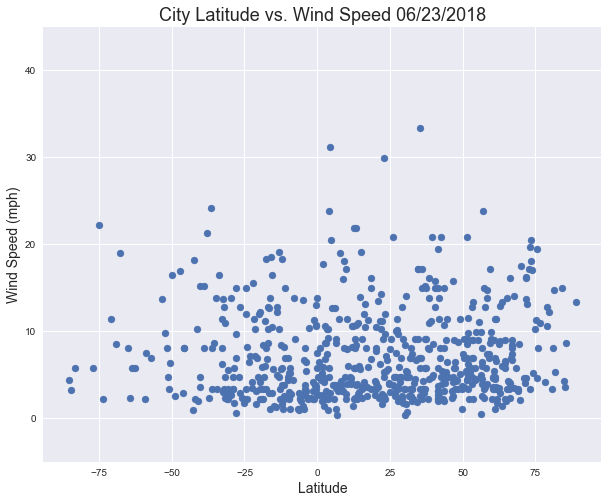

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['wind_speed'])                              
plt.title(f"City Latitude vs. Wind Speed {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")

plt.ylim(-5,45)

plt.savefig("Wind_Speed.png")

plt.show()

## Latitude vs Cloudiness Plot

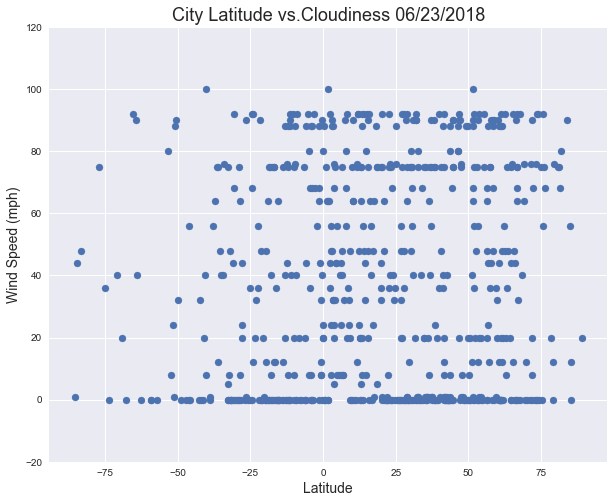

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['clouds'])                              
plt.title(f"City Latitude vs.Cloudiness {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.ylim(-20, 120)

plt.savefig("Cloudiness.png")

plt.show()

In [17]:
df.to_csv(output_data_file, encoding="utf-8", index=False)